In [1]:
from stable_baselines3.ppo import PPO
from stable_baselines3.common.policies import ActorCriticCnnPolicy
from wrapper import DoomEnvironment
from callback import CallBack

[100.   0.   0.  52.]
module 'gym' has no attribute 'GoalEnv'


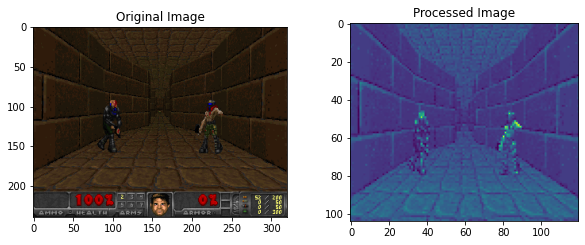

In [2]:
DoomEnvironment.check_environment()
DoomEnvironment.show_difference()

In [3]:
env = DoomEnvironment(config="./ViZDoom/scenarios/basic.cfg")


In [4]:
callback = CallBack(check_freq=10_000)

In [5]:
model = PPO(ActorCriticCnnPolicy, env, verbose=1, learning_rate=0.0001, n_steps=2_048)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [6]:
model.learn(total_timesteps=100_000, callback=callback)

[50.]
[50.]
[49.]
[49.]
[49.]
[49.]
[49.]
[49.]
[49.]
[49.]
[49.]
[49.]
[49.]
[49.]
[48.]
[48.]
[48.]
[48.]
[48.]
[48.]
[47.]
[47.]
[47.]
[46.]
[46.]
[46.]
[46.]
[46.]
[46.]
[46.]
[46.]
[46.]
[45.]
[45.]
[45.]
[45.]
[44.]
[44.]
[44.]
[44.]
[43.]
[43.]
[43.]
[43.]
[43.]
[43.]
[43.]
[43.]
[43.]
[43.]
[50.]
[50.]
[50.]
[50.]
[50.]
[50.]
[50.]
[50.]
[50.]
[50.]
[50.]
[50.]
[50.]
[50.]
[50.]
[50.]
[50.]
[49.]
[49.]
[49.]
[48.]
[48.]
[48.]
[48.]
[48.]
[48.]
[48.]
[48.]
[47.]
[47.]
[47.]
[47.]
[47.]
[46.]
[46.]
[46.]
[45.]
[45.]
[45.]


KeyboardInterrupt: 

In [ ]:
env.close()